Imports

In [1]:
# to get 3d plot to be rotatable (optional)
%matplotlib widget

In [2]:
import numpy as np
import umap
from matplotlib import pyplot as plt
from e_machine import distribution_generator, e_machine, weight_initialization, reservoir

Generating hidden states, inputs, reservoir states

In [17]:
# generate hidden states and inputs
distribution = distribution_generator(num_states=6, num_outputs=2)
sigma, x = e_machine(states=["A", "B", "C", "D", "E", "F"], transition_matrix=distribution, n=100)

# initialize weights
W, v = weight_initialization(n=1)

# initialize hidden state
h = []
h_t = np.zeros_like(v)
h.append(np.transpose(h_t).tolist()[0])

# pass data through reservoir
for x_t in x:
    h_t = reservoir(h_t, x_t, W, v)
    h.append(np.transpose(h_t).tolist()[0])

In [18]:
print(distribution)

[[1.63176427e-04 5.58658926e-02 3.60890801e-03 8.49791010e-02
  1.58799608e-01 8.83852566e-02 5.32731967e-02 9.46009120e-02
  8.81612093e-02 2.31845792e-01 2.67525465e-02 1.13564401e-01]
 [8.68928714e-02 2.95257598e-01 1.00789590e-01 2.49655872e-02
  8.31254211e-03 1.79367759e-02 5.84958573e-02 1.84972748e-01
  6.20208247e-02 8.76831427e-02 3.65432289e-02 3.61292332e-02]
 [6.65457415e-03 2.58364564e-02 1.24780539e-01 4.54155038e-02
  6.72538148e-02 2.20927766e-01 1.53723383e-01 2.46175831e-02
  5.77541090e-02 4.93533378e-02 1.23464603e-01 1.00218329e-01]
 [1.32693817e-01 2.33150607e-01 4.59243235e-02 1.58977713e-01
  1.01185131e-02 1.38888941e-02 3.37293042e-02 2.60119373e-02
  2.83765449e-02 4.40548424e-02 2.34438103e-01 3.86354005e-02]
 [1.26134465e-01 5.10354668e-02 3.78373317e-02 4.53571207e-01
  5.85038390e-02 6.24359105e-02 5.06977148e-02 6.21386354e-03
  1.59977360e-03 5.99995500e-03 1.14462514e-01 3.15079591e-02]
 [2.31424932e-02 1.56456521e-01 7.65237959e-02 2.21653214e-02
  5

In [19]:
print(W)
print(v)

[[0.58306338]]
[[0.26952739]]


If reservoir state has dimension two, we can plot the two states and time with the points colored by state

In [20]:
ordered = {
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5
}

sigma_ordered = [ordered[i] for i in sigma]

In [21]:
if len(h[0]) == 2:
    h_0 = [i[0] for i in h]
    h_1 = [i[1] for i in h]
    
    fig = plt.figure()
 
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    
    # defining axes
    z = h_0
    y = h_1
    x_ = sigma_ordered

    ax.set_zlabel("First component of Reservoir state")
    ax.set_ylabel("Second component of reservoir state")
    ax.set_xlabel("Time")
    ax.scatter(range(len(h_0)), y, z, c=sigma_ordered)

    plt.show()

Dimensionality Reduction (If reservoir state has dimension greater than 1)

In [22]:
if len(h[0]) > 1:
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=1, metric='euclidean')
    h = reducer.fit_transform(h)

Plotting hidden states in order

In [23]:
ordered = {
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5
}

sigma_ordered = [ordered[i] for i in sigma]

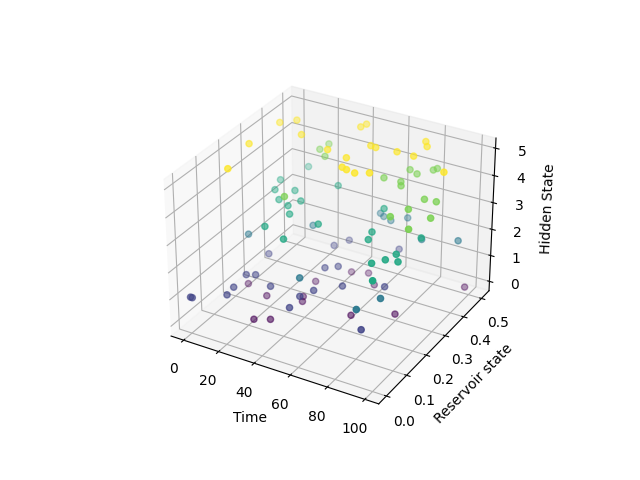

In [35]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h))
y = h
z = sigma_ordered

ax.set_zlabel("Hidden State")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time")
ax.scatter(x_, y, z ,c=sigma_ordered)

plt.show()

Plotting hidden states out of order

In [25]:
unordered = {
    "A" : 3,
    "B" : 4,
    "C" : 1,
    "D" : 0,
    "E" : 5,
    "F" : 2
}

sigma_unordered = [unordered[i] for i in sigma]

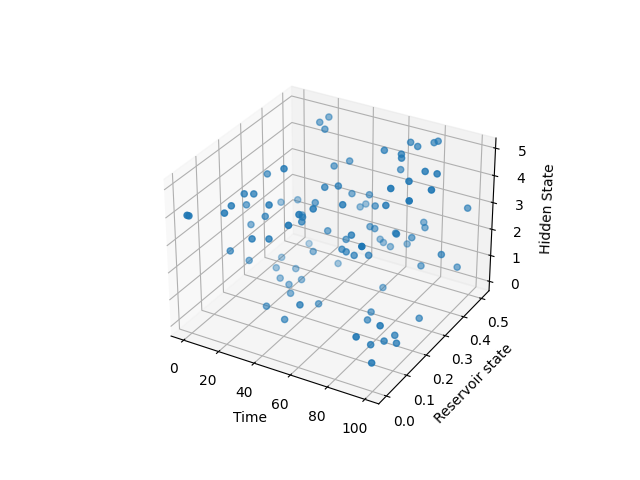

In [33]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h))
y = h
z = sigma_unordered

ax.set_zlabel("Hidden State")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time")
ax.scatter(x_, y, z) #,c=sigma_ordered)

plt.show()

Plotting with hidden state as color

In [27]:
colors = {
    "A" : 'b',
    "B" : 'g',
    "C" : 'r',
    "D" : 'c',
    "E" : 'm',
    "F" : 'y'
}

sigma_colors = [colors[i] for i in sigma]

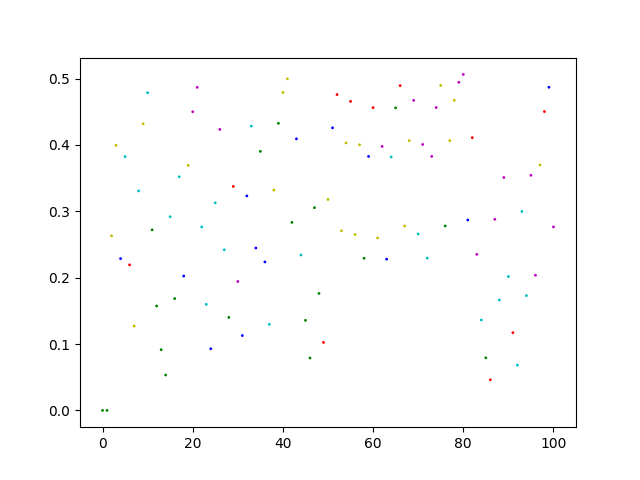

In [28]:
fig = plt.figure()
plt.scatter(range(len(h)), h, s=1, c=sigma_colors)
plt.show()

Colored by input

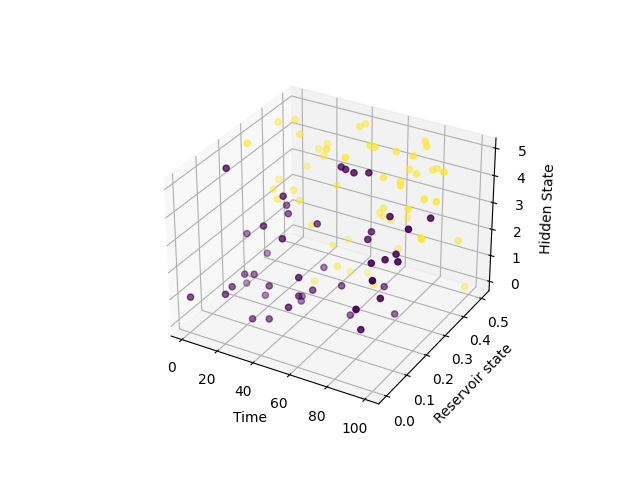

In [29]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h))[1:]
y = h[1:]
z = sigma_ordered[1:]

ax.set_zlabel("Hidden State")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time")
ax.scatter(x_, y, z, c=x)

plt.show()

colored by state

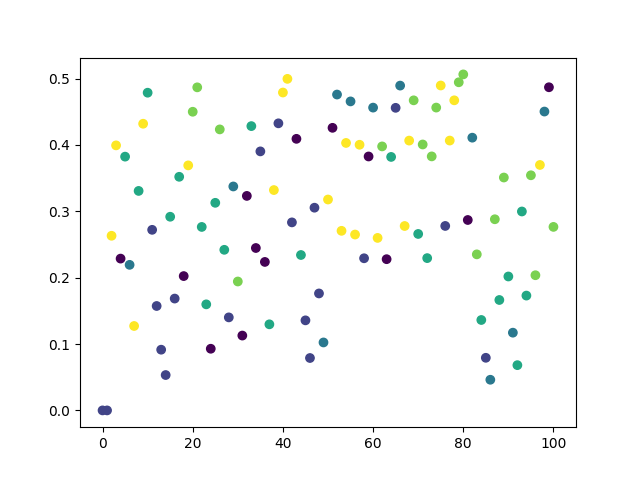

In [30]:
fig = plt.figure()
plt.scatter(range(len(h)), h, c=sigma_ordered)